# In Class Notebook, Week 14

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2021/blob/master/week14/inClass_week14.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

Let me write something!

Before yt, let's check out ipyvolume

## ipyvolume

In [1]:
# import our usual things
import numpy as np
import pandas as pd
import ipyvolume

In [2]:
x, y, z = np.random.random((3, 100)) # 3 dimensions, 100 points total

In [7]:
ipyvolume.quickscatter?

In [8]:
# quick 3d scatter plot
ipyvolume.quickscatter(x,y,z, size=5, marker='diamond')

Now using "real" data -- data from a VERY low resolution simulation of 2 galaxies colliding. (Galaxies are collections of billions of stars, we live in the Milky Way galaxy, our star (the Sun!) is about 1/2 out on a disk of stars in the Milky Way).

In [96]:
galaxy_file = '/Users/jillnaiman/Downloads/outarrsnap_001_fac1n3.txt' # 7 Mb
galaxy_file = '/Users/jillnaiman/Downloads/outarrsnap_001_fac1n2_nt500.txt'



We note: the data is super confusing to look at!  Luckily there is a data reader -- solverlibs.py -- included in the galaxyFiles.zip!

In [22]:
# to load solver -- can copy to current directory

# or update path:
from sys import path
path.append('/Users/jillnaiman/Downloads/')
#path.append('C:\\Users\\jillnaiman\\Downloads\\') # maybe windows?!

In [23]:
path

['/Users/jillnaiman/is445_spring2021/week14',
 '/opt/anaconda3/envs/DataViz/lib/python37.zip',
 '/opt/anaconda3/envs/DataViz/lib/python3.7',
 '/opt/anaconda3/envs/DataViz/lib/python3.7/lib-dynload',
 '',
 '/Users/jillnaiman/.local/lib/python3.7/site-packages',
 '/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages',
 '/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/IPython/extensions',
 '/Users/jillnaiman/.ipython',
 '/Users/jillnaiman/Downloads/',
 '/Users/jillnaiman/Downloads/']

In [21]:
from solverlibs import read_in_galaxy_data

In [13]:
read_in_galaxy_data?

In [14]:
# Note: a terrible person has not included doc strings!!!

In [97]:
t_h, r_h, v_h, e_h, N, part_type = read_in_galaxy_data(galaxy_file)

In [17]:
r_h.shape # 82 particles, 3 positions -- x/y/z, 500 time steps

(82, 3, 500)

In [18]:
N

82

In [98]:
# 3D plot of my initial time step:
nT = 0 # first time step

x, y, z = r_h[:,0, nT], r_h[:,1,nT], r_h[:,2,nT]

In [99]:
ipyvolume.quickscatter(x,y,z, size=3, marker="sphere") # plots one time step

In [34]:
# all timesteps by "unwrapping"

x = r_h[:,0,:].ravel() # 1D
y = r_h[:,1,:].ravel()
z = r_h[:,2,:].ravel()

In [35]:
x

array([-0.55503449, -0.5316963 , -0.50835813, ..., -1.42056334,
       -1.42175787, -1.42295243])

In [36]:
ipyvolume.quickscatter(x,y,z, size=3, marker='sphere')

This is not super useful, but we can do better using a quiver plot:

In [38]:
ipyvolume.figure()
# use quiver plot -- x,y,z positions and vx,vy,vz velocity vector components

for i in range(r_h.shape[0]): # loop through every particle
    ipyvolume.quiver(r_h[i,0,:], # ith particle, x position, all time steps
                    r_h[i,1,:], # ith particle, y postion, all time steps
                    r_h[i,2,:], # ith particle, z postion, all timesteps
                    v_h[i,0,:], # ith particle, vx (velocity in x direction), all time steps
                    v_h[i,1,:], # ith particle, vy, all times
                    v_h[i,2,:], # ith particle, vz, all times
                    size=1)
ipyvolume.show()

In [52]:
N # number of particles

82

In [54]:
Nt = r_h.shape[2] # number of timesteps!
Nt

500

In [55]:
# sub sample to see arrows
step = 10 # only plot each 10th timestep

ipyvolume.figure()
# use quiver plot -- x,y,z positions and vx,vy,vz velocity vector components

for i in range(r_h.shape[0]): # loop through every particle
    ipyvolume.quiver(r_h[i,0,0:Nt:step], # ith particle, x position, every 10th time step
                    r_h[i,1,0:Nt:step], # ith particle, y postion
                    r_h[i,2,0:Nt:step], # ith particle, z postion
                    v_h[i,0,0:Nt:step], # ith particle, vx (velocity in x direction)
                    v_h[i,1,0:Nt:step], # ith particle, vy
                    v_h[i,2,0:Nt:step], # ith particle, vz
                    size=1)
ipyvolume.show()

## 3D animations with ipyvolume

For data formatting reasons, we will take the **transpose** of our data matricies

In [44]:
print(r_h[:,0,:].shape, r_h[:,0,:].T.shape)

(82, 500) (500, 82)


Down sample our position and velocity vectors for smoother animations:

In [100]:
step = 10 # only save each 10th time step

r = r_h[:,:,0:Nt:step]
v = v_h[:,:,0:Nt:step]

In [58]:
r.shape

(82, 3, 50)

Scatter plot + animation:

In [101]:
ipyvolume.figure()

s = ipyvolume.scatter(r[:,0,:].T, r[:,1,:].T, r[:,2,:].T, marker='sphere')
#s = ipyvolume.scatter(r[:,0,:], r[:,1,:], r[:,2,:], marker='sphere') # shows 1 trajectory
#s = ipyvolume.scatter(r[:,0,:].ravel(), r[:,1,:].ravel(), r[:,2,:].ravel(), marker='sphere') # all particles, all time

# add in animation
ani = ipyvolume.animation_control(s, interval=200) # 200 millisec between "snapshots"

ipyvolume.show()

**Astronomy note:** this is a VERY low resolution simulation!  That is why the galaxies don't merge but fly apart!

## Combine ipywidgets + ipyvolume for more controls

In [66]:
import ipywidgets

In [67]:
# plot all trajectories, static scatter plot, downsampled data

In [74]:
ipyvolume.figure()

s = ipyvolume.scatter(r[:,0,:].ravel(), r[:,1,:].ravel(), r[:,2,:].ravel(), 
                     marker='sphere', size=5)

ipyvolume.show()

Make a float slider widget that I can use to change the sizes of my spheres:

In [69]:
size = ipywidgets.FloatSlider(min=0,max=30,step=0.1)

In [70]:
size

FloatSlider(value=0.0, max=30.0)

In [72]:
size.value # value attribute associated with this widget slider

9.8

In [75]:
s.size

array(5)

Recall: `jslink` a function to link attributes of widgets on the JS/"front-end" side:

In [76]:
ipywidgets.jslink((s,'size'),(size,'value'))

Link(source=(Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', line_material=ShaderMaterial(),…

Recall we can also use layout widgets:

In [77]:
ipywidgets.VBox([ipyvolume.gcc(),size]) # ipyvolume.gcc() grabs current plot

Also link a color widget:

In [78]:
color = ipywidgets.ColorPicker()

In [79]:
color

ColorPicker(value='black')

In [81]:
color.value

'#2f5b44'

In [80]:
s.color

array('red', dtype='<U3')

In [82]:
# link color attribute of ipyvolume plot with widget
ipywidgets.jslink((s,'color'),(color,'value'))

Link(source=(Scatter(color_selected=array('white', dtype='<U5'), geo='sphere', line_material=ShaderMaterial(),…

In [83]:
# layout again:
ipywidgets.VBox([ipyvolume.gcc(), size, color])

## Export ipyvolume to a HTML page

In [84]:
myVBox = ipywidgets.VBox([ipyvolume.gcc(), size, color])

In [85]:
# some formatting things so that our box isn't super small
ipyvolume.embed.layout = myVBox.children[1].layout
ipyvolume.embed.layout.min_width = "400px"

Make this into a webpage!

In [86]:
ipyvolume.embed.embed_html("testPage.html",myVBox,offline=False,devmode=False)

If on mac/linux:

In [87]:
!open myPage.html

## Export widgets + ipyvolume + animation

In [94]:
ipyvolume.figure()

# widgets
size = ipywidgets.FloatSlider(min=0,max=30, step=0.1, description='Size')
color = ipywidgets.ColorPicker()

# scatter plot
s = ipyvolume.scatter(r[:,0,:].T, r[:,1,:].T, r[:,2,:].T, marker='sphere')

# widget links to scatter plot
ipywidgets.jslink((s,'size'),(size,'value'))
ipywidgets.jslink((s,'color'),(color,'value'))

# add in animation
ani = ipyvolume.animation_control(s, interval=200)

#ipyvolume.show()
myVbox = ipywidgets.VBox([ipyvolume.gcc(),size,color])

# layout things like before:
ipyvolume.embed.layout = myVbox.children[1].layout 
ipyvolume.embed.layout.min_width = '400px'
ipyvolume.embed.embed_html("testPage2.html", myVbox, offline=False, devmode=False)

In [95]:
!open testPage2.html

# yt (finally!)

In [102]:
import yt

In [103]:
ds = yt.load("/Users/jillnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2021-04-26 11:13:14,039 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2021-04-26 11:13:14,040 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-04-26 11:13:14,041 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-04-26 11:13:14,041 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-04-26 11:13:14,042 Parameters: cosmological_simulation   = 0.0


In [104]:
ds.print_stats()

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 10187.21it/s]
yt : [INFO     ] 2021-04-26 11:14:46,977 Gathering a field list (this may take a moment.)


level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         32768	            32
  1	     8	         34304	            33
  2	     8	        181888	            57
  3	     8	        646968	            87
  4	    15	        947856	            99
  5	    51	        874128	            96
  6	    18	        786328	            93
  7	    28	        446776	            77
  8	    36	        209400	            60
----------------------------------------------
   	   173	       4160416


t = 6.00002000e-03 = 1.39768066e+16 s = 4.42898275e+08 years

Smallest Cell:
	Width: 1.221e-04 Mpc
	Width: 1.221e+02 pc
	Width: 2.518e+07 AU
	Width: 3.767e+20 cm


In [105]:
ds.field_list

[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

In [106]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [107]:
ds.domain_right_edge

In [108]:
ds.domain_left_edge

In [109]:
ds.r[:].max("density")

7.73426503924e-24 g/cm**3

In [110]:
ds.r[:].min("density")

8.472937507539987e-32 g/cm**3

In [111]:
ds.r[:].argmax("density")

(1.5556197509765625e+24 cm,
 1.5424349365234375e+24 cm,
 1.5435650634765623e+24 cm)

yt : [INFO     ] 2021-04-26 11:22:34,953 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-04-26 11:22:34,954 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-04-26 11:22:34,956 Making a fixed resolution buffer of (density) 800 by 800
yt : [INFO     ] 2021-04-26 11:22:35,035 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



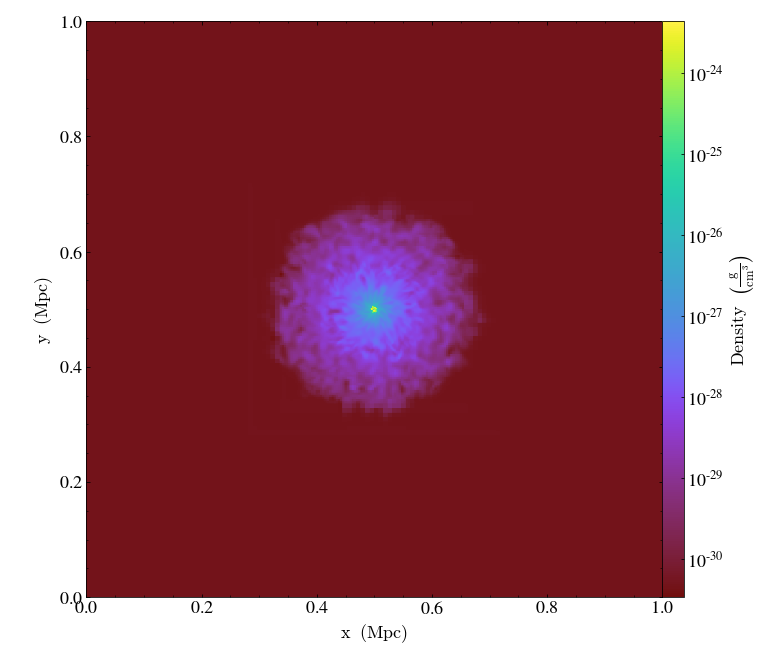

In [114]:
# quick slice plot -- 1/2 of the way through the z-direction:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2,2]


p = ds.r[:,:,0.5].plot("density")